<b> MIS 382N: ADVANCED MACHINE LEARNING<b>

Assignment 2

Total points: 70

Due: Friday, September 23 to be submitted via Canvas by 11:59 pm

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Bias and Variance (10 pts)

(a). (4 pts) Describe the difference between model bias and the bias of a point estimator. 

(b) (6 pts). How can you use a learning curve to determine whether a model is overfitting  (for a given sample size)? Discuss this with respect to the observed train and validation error curves. How does your answer change if the model you are trying to determine if the model is underfitting?

Ans (a) :
*Model Bias:* 
Model bias tells us how well a model fits the training set. It tells us how much assumption our model is making on the given training data. The more simpler the assumption of the model is, the greater is the bias of the model


*Bias of a point estimator:*
Point estimator is the averaged value of a random sample obtained from a population. It may be different from the mean of entire population. Therefore bias of a point estimator is the difference between expected value of the estimator and value of parameter which is being estimated 

Ans (b):
A learning curve is a plot of the training and validation sets with RMSE against the number of epochs or size of training data. It basically indicates the model's learning performance with experience or time. 
To determine overfitting of a model, we would look to determine how well the training performance is as compared to the test performance. If the training error is decreasing over the number of epochs and the test error keeps on increasing, it is a strong indicator that the model is overfitting.  

We can get the indication of underfitting simply from the learning curve of training performance. If the training curve is flat and the error is very high, we can infer that the model is not learning that well on the training data. Additionally, if the training loss continues to decrease till the end of the training data, it means that the model was capable of achieving a lower error but could not attain it

# Answer : 

# Question 2: Bias-Variance Exploration (20 pts)
We want to build a model that can predict y for unknown inputs x.

(a) (10 pts) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. Tips: you can use np.vander(np.squeeze(x_train), deg+1) to generate the deg-degree polynomial vector of x_train. For example, np.vander(np.squeeze(x_train), 3) gives you the second-degree polynomial of x_train.

(b) (5 pts) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) (5 pts) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a single plot of the  𝑙𝑜𝑔(𝑀𝑆𝐸)  for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them. You can use the following codes to load the dataset and complete the analysis:

In [14]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
#from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
#uploaded = files.upload()

Saving data.npy to data.npy


In [15]:
data_load = np.load('./data.npy', allow_pickle = True)

In [36]:
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-5,5,101).reshape(-1,1)

lrp = LinearRegression()

In [37]:
poly_2 = PolynomialFeatures(degree=2)
x_train_poly2 = poly_2.fit_transform(x_train.reshape(-1,1))
x_test_poly2 = poly_2.transform(x_test.reshape(-1,1))
lrp.fit(x_train_poly2, y_train)
y_pred = lrp.predict(x_test_poly2)
print(mean_squared_error(y_test, y_pred))

320.06408346977855


In [38]:
poly_4 = PolynomialFeatures(degree=4)
x_train_poly4 = poly_4.fit_transform(x_train.reshape(-1,1))
x_test_poly4 = poly_4.transform(x_test.reshape(-1,1))
lrp.fit(x_train_poly4, y_train)
y_pred = lrp.predict(x_test_poly4)
print(mean_squared_error(y_test, y_pred))

31.292082886606693


In [39]:
poly_7 = PolynomialFeatures(degree=7)
x_train_poly7 = poly_7.fit_transform(x_train.reshape(-1,1))
x_test_poly7 = poly_7.transform(x_test.reshape(-1,1))
lrp.fit(x_train_poly7, y_train)
y_pred = lrp.predict(x_test_poly7)
print(mean_squared_error(y_test, y_pred))

33.41069407769065


In [138]:
poly_2 = PolynomialFeatures(degree=2)
x_train_poly2 = np.vander(np.squeeze(x_train), 2+1)
x_test_poly2 = np.vander(np.squeeze(x_train), 2+1)
lrp.fit(x_train_poly2, y_train)
y_pred = lrp.predict(x_test_poly2)
print(mean_squared_error(y_test, y_pred))
X_all_poly2 = poly_2.transform(x_all)
y_all = lrp.predict(X_all_poly2)
plt.plot(x_all, y_all, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [30, 100]

31.292082886606693


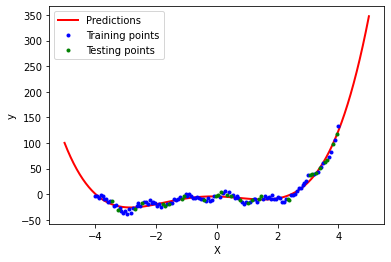

In [41]:
poly_4 = PolynomialFeatures(degree=4)
x_train_poly4 = poly_4.fit_transform(x_train.reshape(-1,1))
x_test_poly4 = poly_4.transform(x_test.reshape(-1,1))
lrp.fit(x_train_poly4, y_train)

y_pred = lrp.predict(x_test_poly4)
print(mean_squared_error(y_test, y_pred))
X_all_poly4 = poly_4.transform(x_all)
y_all = lrp.predict(X_all_poly4)
plt.plot(x_all, y_all, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

33.41069407769065


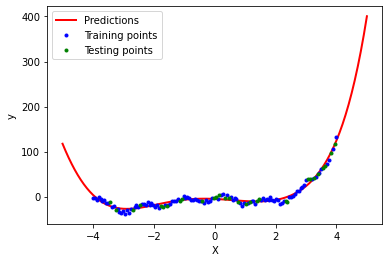

In [42]:
poly_7 = PolynomialFeatures(degree=7)
x_train_poly7 = poly_7.fit_transform(x_train.reshape(-1,1))
x_test_poly7 = poly_7.transform(x_test.reshape(-1,1))
lrp.fit(x_train_poly7, y_train)
y_pred = lrp.predict(x_test_poly7)
print(mean_squared_error(y_test, y_pred))
X_all_poly7 = poly_7.transform(x_all)
y_all = lrp.predict(X_all_poly7)
plt.plot(x_all, y_all, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [47]:
poly_4.fit_transform(x_train.reshape(-1,1))

array([[ 1.00000000e+00, -3.50387597e+00,  1.22771468e+01,
        -4.30175997e+01,  1.50728334e+02],
       [ 1.00000000e+00, -3.41085271e-01,  1.16339162e-01,
        -3.96815747e-02,  1.35348007e-02],
       [ 1.00000000e+00,  1.70542636e+00,  2.90847906e+00,
         4.96019684e+00,  8.45925043e+00],
       [ 1.00000000e+00,  2.44961240e+00,  6.00060093e+00,
         1.46991465e+01,  3.60072115e+01],
       [ 1.00000000e+00,  2.01550388e+00,  4.06225587e+00,
         8.18749246e+00,  1.65019228e+01],
       [ 1.00000000e+00, -2.13953488e+00,  4.57760952e+00,
        -9.79395525e+00,  2.09545089e+01],
       [ 1.00000000e+00, -1.27131783e+00,  1.61624902e+00,
        -2.05476620e+00,  2.61226091e+00],
       [ 1.00000000e+00, -1.95348837e+00,  3.81611682e+00,
        -7.45473983e+00,  1.45627476e+01],
       [ 1.00000000e+00, -9.30232558e-02,  8.65332612e-03,
        -8.04960570e-04,  7.48800530e-05],
       [ 1.00000000e+00, -2.38759690e+00,  5.70061895e+00,
        -1.36107801e+01

In [12]:
def plot_curves(x_train, y_train, x_test, y_test):
    # Fit polynomial models of degrees 2, 4, 7 to the training data. 
    # Print out the mean squared error (on both train and test sets) for all the models. 
    # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). 
    # YOUR CODE COMES HERE
    print("IMPLEMENT ME!")
    
    return [0, 0, 0], [0, 0, 0]

In [ ]:
# Fit the different polynomials to the training data and make the plots 
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

IMPLEMENT ME!


In [ ]:
# Study the effects of the training data size on the bias and variance
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

# Answer : 

# Question 3: Stochastic Gradient Descent Improvements (10 pts)

1. (5 pts) Read this [blog](https://medium.com/optimization-algorithms-for-deep-neural-networks/gradient-descent-with-momentum-dce805cd8de8) on medium and describe in your own words how momentum leads to a faster convergence of the loss function. 

2. (5 pts) Read this [blog](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461) on medium and explain in your own words the advantages of Mini-batch Stochastic Gradient Descent. 


# Answer : 
1.

We use momentum to basically reduce the learning variation perpendicular to the direction of the local optima and accelerate the convergence in the direction of the local optima. 
In the diagram given in the article the optima is shown to be horizontally to the right of the initial position. If we have a higher learning rate, it causes more number of oscillations in the vertical direction, which is basically inefficient, as the number of iterations toi reach the optima increases.
Hence by using exponentially weighted averages, we average out this oscillations in vertical direction towards zero, whereas the derivatives in the horizontal direction are added, thereby converging towards the local optima faster.

In this method, we choose momentum hyperparameter along with regularization.
In momentum we take the exponentially weighted averages of dW and db, instead of using dW and db independently for each epoch.

VdW = β * VdW + (1 — β) * dW

Vdb = β * Vdb + (1 — β) *db

The momentum (beta) must be higher to smooth out the update because we give more weight to the past gradients. Typically this value is between 0.8 to 0.999, recommended to be kept as 0.9 by default

Q3)2. 

Mini-batch Gradient Descent tries to make the best of both worlds - Batch Gradient Descent and the Stochastic Gradient Descent. In Batch Gradient Descent, the entire training dataset is used calculate the gradient to update the weight in each iteration. Whereas, the Stochastic Gradient Descent uses only one random data point from the training set in each iteration to calculate gradient and update weights. 

In the Mini-batch method, we only use a few data points in each iteration. For the next iteration, we use the next 'mini-batch' and so on, till we have used the entire training set. This is called one epoch, and we usually perform multiple such epochs with new batches each time, to get to the optimum value.

The advantage of using a small batch instead of the entire set is the reduction in computation. If the training set is too large, the computation might be very slow, or even impossible. We could also rum out of memory. However, if the batch is smaller than the entire set by a factor of n, then the computation at each iteration will also reduce to factor of n. The memory requirements are also reduced since we are not passing our entire training set to calculate gradient.

On the other hand, if the batch size is 1 (stochastic), we get a noisy path with a lot of noise. This is because in each iteration, we are only approximating the gradient with a single data point. Hence we will see a lot of fluctuations in the cost and a lower accuracy. Using a mini-batch instead will smoothen out the path and will have a better accuracy.

# Question 4: Stochastic Gradient Descent (30 pts)

1.(**10 pts**) Stochastic gradient descent derivation<br>

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：

$$ y = w_0 + w_1e^{-x_1} + w_2 x_1 + w_3x_1x_2 $$ 


2.(**20 pts**) Stochastic gradient descent coding <br>

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1e^{-x_1} + w_2x_1 + w_3x_1x_2 $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use the expression derived in part 1 to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
#from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
#uploaded = files.upload()

In [131]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)
        
        
    def sgd(self, gradient):
        self.coef = self.coef - gradient*self.learning_rate
        # = please put your codes here to update the self.coef using SGD
        self.coef[1:] = self.coef[1:] - (self.regularization*self.coef[1:])*self.learning_rate

        
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            gradient = np.array([0.0]*self.coef.shape[0])
            for i in range(X.shape[0]):
                # Compute error
                   #please put your codes here
                # Compute gradients
                    #please put your codes here
                    hypothesis = self.linearPredict(X[i]) # Predicted Y
                    error = hypothesis - y[i]
                # Update weights
                    gradient = error*X[i]
                    self.sgd(gradient)
            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
        #compute the dot product of self.coef and X
        return np.dot(X,self.coef) #this line is just a placeholder, please delete this line in your code        

In [132]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

# Answer :

<h3>Part 1: derive the coefficent updates for the 4 coefficients</h3>
Consider t as target and y as predicted output. The predicted output is given by:

$$
\begin{equation}
y = w_0 + w_1e^{-x_1}+ w_2x_1+w_3x_1x_2\\
w^{t+1} = w^t - \eta \Delta E\\
E = (t - y)^2\\
\triangledown E= 2(t-y)\frac{\partial y}{\partial w}\\
\therefore w^{t+1} = w^t - \eta (2(t-y)\frac{\partial y}{\partial w})\\
{w_0}'= w_0 - \eta (2(t-y)(1))\\
= w_0 - 2\eta (t-y)\\
{w_1}'= w_1 - \eta (2(t-y)e^{-x_1})\\
= w_1 - 2\eta (t-y)e^{-x_1}\\
{w_2}'= w_2 - \eta (2(t-y)e^{-x_1})\\
= w_2 - 2\eta (t-y)x_1\\
{w_3}'= w_3 - \eta (2(t-y)x_1x_2)\\
= w_3 - 2\eta (t-y)x_1x_2\\
\end{equation}
$$

These are the coefficient updates for the 4 coefficients in the given model

In [133]:
mse = pd.DataFrame(columns=learning_rate, index=regularization)
for alpha in learning_rate:
    for lamda in regularization:
        reg = Regression(learning_rate = alpha, regularization= lamda, n_epoch= n_epochs)
        reg.fit(X,y, update_rule="sgd", plot= False)
        mse[alpha][lamda] = reg.lowest_mse
mse

,0.0001,0.0010,0.0100,0.1000,1.0000,10.0000,100.0000
0,0.036821,0.030496,0.027391,0.030988,inf,NaN,NaN
10,0.040382,0.033707,0.033821,0.034648,NaN,NaN,NaN
100,0.040672,0.033795,0.033805,NaN,NaN,NaN,NaN


MSE for SGD with Learning Rate=0.01 and Regularisation=0:  0.02739108757520101


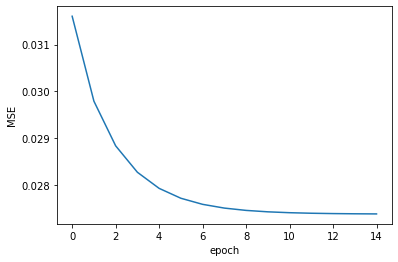

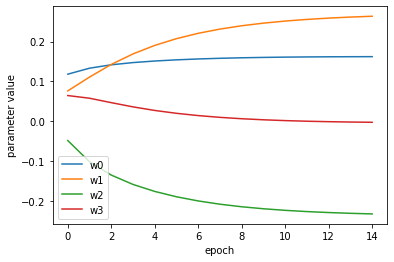

In [136]:
#Minimum MSE is obtained for learning rate = 0.01 and regularization = 0
reg = Regression(learning_rate = 0.01, regularization= 0, n_epoch= n_epochs)
reg.fit(X,y, update_rule="sgd", plot= True)
print("MSE for SGD with Learning Rate=0.01 and Regularisation=0: ",reg.lowest_mse)

MSE for SGD with Learning Rate=0.001 and Regularisation=0:  0.030495991520073516


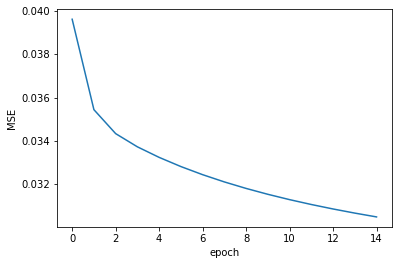

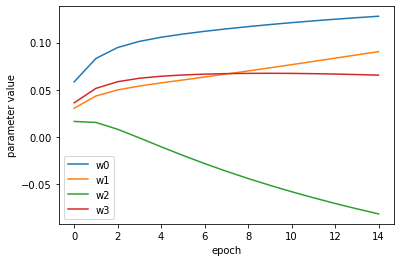

In [137]:
#second best MSE is obtained for learning rate = 0.001 and regularization = 0
reg = Regression(learning_rate = 0.001, regularization= 0, n_epoch= n_epochs)
reg.fit(X,y, update_rule="sgd", plot= True)
print("MSE for SGD with Learning Rate=0.001 and Regularisation=0: ",reg.lowest_mse)

### Part b)

Best MSE: 

    MSE = 0.027391
    learning rate = 0.01
    regularization parameter = 0
    
Second best MSE: 

    MSE = 0.030496
    learning rate = 0.001
    regularization parameter = 0
    